In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_training = pd.read_csv('C:/Users/Tony/Downloads/2020_Competition_Training (1).csv', low_memory=False)

In [3]:
data_holdout = pd.read_csv('C:/Users/Tony/Downloads/2020_Competition_Holdout .csv', low_memory=False)

In [4]:
data_holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17681 entries, 0 to 17680
Columns: 825 entries, person_id_syn to submcc_rsk_chol_ind
dtypes: float64(443), int64(360), object(22)
memory usage: 111.3+ MB


In [5]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69572 entries, 0 to 69571
Columns: 826 entries, person_id_syn to submcc_rsk_chol_ind
dtypes: float64(443), int64(361), object(22)
memory usage: 438.4+ MB


## Integrate the holdout and training for data cleaning

In [6]:
data_all=pd.concat([data_training.drop('transportation_issues', axis = 1),data_holdout],axis=0)

In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87253 entries, 0 to 17680
Columns: 825 entries, person_id_syn to submcc_rsk_chol_ind
dtypes: float64(443), int64(360), object(22)
memory usage: 549.9+ MB


### add id column as row identifier

In [8]:
data_all['id']=list(range(0,87253))

In [9]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87253 entries, 0 to 17680
Columns: 826 entries, person_id_syn to id
dtypes: float64(443), int64(361), object(22)
memory usage: 550.5+ MB


### drop person_id_syn

In [10]:
data_all=data_all.drop('person_id_syn', axis = 1)

In [11]:
data_all

,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,...,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind,id
0,EM,F,62,1,0,ENG,UNK,3.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,EM,F,59,1,0,ENG,C2,1.0,2,5,...,0,0,0,1,0,0,0,0,1,1
2,EM,F,63,0,0,ENG,UNK,3.0,0,6,...,0,0,0,0,0,0,0,0,1,2
3,EM,M,75,0,0,ENG,H6,3.0,0,2,...,0,0,0,1,0,0,0,0,1,3
4,EM,M,51,1,0,ENG,UNK,3.0,1,4,...,0,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676,EM,M,79,0,0,ENG,H7,8.0,2,3,...,0,0,0,0,0,0,0,0,0,87248
17677,LV,M,86,0,1,ENG,H3,5.0,4,4,...,0,0,0,0,0,0,0,0,1,87249
17678,LV,F,74,0,0,ENG,H1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,87250
17679,EM,F,77,0,0,ENG,H2,5.0,3,4,...,0,0,0,0,0,0,0,0,1,87251


### seperate location columns for analysis in mysql

In [12]:
data_all_loc=data_all[['id','cnty_cd','state_cd']]

In [13]:
data_all_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87253 entries, 0 to 17680
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        87253 non-null  int64 
 1   cnty_cd   87253 non-null  object
 2   state_cd  87253 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


### write to csv

In [14]:
data_all_loc.to_csv("data_all_loc.csv")

### import the location info back to python

In [15]:
location_all=pd.read_csv('C:/Users/Tony/Downloads/location_all.csv',sep=';')

In [16]:
location_all

,id,cnty_cd,state_cd,state_code,county_cd,num_hospitals
0,0,other,other,other,otherother,0
1,1,other,other,other,otherother,0
2,2,other,other,other,otherother,0
3,3,other,other,other,otherother,0
4,4,other,other,other,otherother,0
...,...,...,...,...,...,...
87248,87248,013,AZ,4,4013,78
87249,87249,other,other,other,otherother,0
87250,87250,other,other,other,otherother,0
87251,87251,063,LA,22,22063,1


In [17]:
location_all[['id','num_hospitals']]

,id,num_hospitals
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
87248,87248,78
87249,87249,0
87250,87250,0
87251,87251,1


In [18]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87253 entries, 0 to 17680
Columns: 825 entries, src_platform_cd to id
dtypes: float64(443), int64(361), object(21)
memory usage: 549.9+ MB


In [19]:
data=pd.merge(data_all, location_all[['id','num_hospitals']], on='id')

In [20]:
data['num_hospitals']=data['num_hospitals'].astype('object')

## Deal with object-type columns

In [21]:
data_object=data.loc[:, data.dtypes == object]

In [22]:
data_object.columns

Index(['src_platform_cd', 'sex_cd', 'lang_spoken_cd', 'mabh_seg',
       'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp', 'cons_homstat',
       'hedis_ami', 'hedis_cmc_ldc_c_control', 'hedis_cmc_ldc_c_screen',
       'hedis_dia_eye', 'hedis_dia_hba1c_ge9', 'hedis_dia_hba1c_test',
       'hedis_dia_ldc_c_control', 'hedis_dia_ldc_c_screen',
       'hedis_dia_ma_nephr', 'rucc_category', 'zip_cd', 'cnty_cd', 'state_cd',
       'num_hospitals'],
      dtype='object')

In [23]:
for i in range(0,22):
    print(data_object.iloc[:,i].value_counts())

EM    62614
LV    24639
Name: src_platform_cd, dtype: int64
F    51471
M    35782
Name: sex_cd, dtype: int64
ENG    80061
SPA     4709
E       2483
Name: lang_spoken_cd, dtype: int64
H2     20603
UNK    15956
H6      9334
H1      8367
C4      8086
C2      7404
H7      5209
C5      3646
H4      2765
C3      1610
H3      1374
H8       862
H5       604
C6       600
C1       435
C7       398
Name: mabh_seg, dtype: int64
CN    63640
CP     8805
E      4641
CF     4476
D       219
C2       89
I        58
SE       48
*         7
Name: cms_ra_factor_type_cd, dtype: int64
4    29555
3    24229
6     4878
5     4287
2      174
0       54
*       21
Name: cons_cmys, dtype: int64
B    16277
L    13327
A     8737
U     7299
J     7255
D     1973
K     1905
G     1489
F     1247
C     1240
H     1221
E      613
I      606
Name: cons_hhcomp, dtype: int64
Y    43663
U     7135
P     6367
R     5294
T      726
Name: cons_homstat, dtype: int64
Y    196
N     96
Name: hedis_ami, dtype: int64
N    10269
Y

In [24]:
data_object_get_dummies_list=['src_platform_cd', 'sex_cd', 'lang_spoken_cd',
       'mabh_seg', 'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp',
       'cons_homstat', 'hedis_ami', 'hedis_cmc_ldc_c_control',
       'hedis_cmc_ldc_c_screen', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9',
       'hedis_dia_hba1c_test', 'hedis_dia_ldc_c_control',
       'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr', 'rucc_category','num_hospitals']

In [25]:
data_object_get_dummies_list

['src_platform_cd',
 'sex_cd',
 'lang_spoken_cd',
 'mabh_seg',
 'cms_ra_factor_type_cd',
 'cons_cmys',
 'cons_hhcomp',
 'cons_homstat',
 'hedis_ami',
 'hedis_cmc_ldc_c_control',
 'hedis_cmc_ldc_c_screen',
 'hedis_dia_eye',
 'hedis_dia_hba1c_ge9',
 'hedis_dia_hba1c_test',
 'hedis_dia_ldc_c_control',
 'hedis_dia_ldc_c_screen',
 'hedis_dia_ma_nephr',
 'rucc_category',
 'num_hospitals']

In [26]:
data_object_get_dummies=data_object[data_object_get_dummies_list]

In [27]:
data_object_get_dummies

,src_platform_cd,sex_cd,lang_spoken_cd,mabh_seg,cms_ra_factor_type_cd,cons_cmys,cons_hhcomp,cons_homstat,hedis_ami,hedis_cmc_ldc_c_control,hedis_cmc_ldc_c_screen,hedis_dia_eye,hedis_dia_hba1c_ge9,hedis_dia_hba1c_test,hedis_dia_ldc_c_control,hedis_dia_ldc_c_screen,hedis_dia_ma_nephr,rucc_category,num_hospitals
0,EM,F,ENG,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,N,N,N,Y,1-Metro,0
1,EM,F,ENG,C2,CP,4,U,R,NaN,N,Y,Y,N,N,N,Y,N,2-Metro,0
2,EM,F,ENG,UNK,CN,6,C,R,NaN,NaN,NaN,Y,N,Y,Y,Y,Y,1-Metro,0
3,EM,M,ENG,H6,CN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,Y,Y,Y,Y,7-Nonmetro,0
4,EM,M,ENG,UNK,CF,4,J,R,NaN,NaN,NaN,Y,N,N,Y,Y,Y,1-Metro,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,EM,M,ENG,H7,CN,5,B,Y,NaN,NaN,NaN,Y,N,N,N,Y,Y,1-Metro,78
87249,LV,M,ENG,H3,CN,3,J,Y,NaN,N,N,Y,N,N,N,N,N,2-Metro,0
87250,LV,F,ENG,H1,CN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,N,N,N,Y,3-Metro,0
87251,EM,F,ENG,H2,CN,4,U,P,NaN,Y,Y,Y,N,N,Y,Y,Y,1-Metro,1


In [28]:
data_dumy = pd.get_dummies(data_object_get_dummies, dummy_na=True)

In [29]:
data_dumy

,src_platform_cd_EM,src_platform_cd_LV,src_platform_cd_nan,sex_cd_F,sex_cd_M,sex_cd_nan,lang_spoken_cd_E,lang_spoken_cd_ENG,lang_spoken_cd_SPA,lang_spoken_cd_nan,...,num_hospitals_28.0,num_hospitals_30.0,num_hospitals_37.0,num_hospitals_47.0,num_hospitals_57.0,num_hospitals_58.0,num_hospitals_73.0,num_hospitals_78.0,num_hospitals_94.0,num_hospitals_nan
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
87249,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
87250,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
87251,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data_dumy.columns[data_dumy.isna().any()].tolist()

[]

## Deal with non-object columns

In [31]:
data_not_object=data.loc[:, data.dtypes != object]

In [32]:
data_not_object.dtypes.value_counts()

float64    443
int64      361
dtype: int64

In [33]:
bool_cols = [col for col in data_not_object 
              if np.isin(data_not_object[col].dropna().unique(), [0, 1]).all()]
data_binary=data_not_object[bool_cols]

In [34]:
data_binary

,smoker_current_ind,smoker_former_ind,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,...,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
87249,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
87250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data_binary.columns

Index(['smoker_current_ind', 'smoker_former_ind', 'bh_adtp_ind', 'bh_aoth_ind',
       'bh_bipr_ind', 'bh_cdal_ind', 'bh_cdsb_ind', 'bh_cdto_ind',
       'bh_dema_ind', 'ccsp_014_ind',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=413)

In [36]:
list_binary=data_binary.columns[0:413]

In [37]:
list_binary

Index(['smoker_current_ind', 'smoker_former_ind', 'bh_adtp_ind', 'bh_aoth_ind',
       'bh_bipr_ind', 'bh_cdal_ind', 'bh_cdsb_ind', 'bh_cdto_ind',
       'bh_dema_ind', 'ccsp_014_ind',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=413)

In [38]:
cat=data_binary[list_binary].astype('object')

In [39]:
good_binary=pd.get_dummies(cat, dummy_na=True)

In [40]:
list_not_binary=np.setdiff1d(data_not_object.columns, data_binary.columns)

In [41]:
data_not_object[list_not_binary]

,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,...,total_ip_acute_admit_days_pmpm,total_ip_mhsa_admit_ct_pmpm,total_ip_mhsa_admit_days_pmpm,total_ip_rehab_admit_ct_pmpm,total_ip_rehab_admit_days_pmpm,total_ip_snf_admit_ct_pmpm,total_ip_snf_admit_days_pmpm,total_outpatient_visit_ct_pmpm,total_physician_office_visit_ct_pmpm,total_urgent_care_visit_ct_pmpm
0,0.0,0.0,1.162658,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250900,0.0
1,0.0,0.0,1.155124,0.0,0.0,0.085593,0.085873,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.172128,0.0
2,0.0,0.0,0.333333,0.0,0.0,0.133333,0.083333,1.250000,0.0,0.166667,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.416667,0.0
3,0.0,0.0,0.250000,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.250000,0.0
4,0.0,0.0,0.083333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.083333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.750000,0.0
87249,0.0,0.0,0.414881,0.0,0.0,0.000000,0.088071,0.000000,0.0,0.088001,...,0.086333,0.0,0.0,0.0,0.0,0.0,0.0,0.086139,0.334198,0.0
87250,0.0,0.0,0.353289,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.178213,0.288899,0.0
87251,0.0,0.0,0.563333,0.0,0.0,0.166667,0.500000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.583333,0.833333,0.0


In [42]:
continuous=data_not_object[list_not_binary] 

In [43]:
good_binary

,smoker_current_ind_0.0,smoker_current_ind_1.0,smoker_current_ind_nan,smoker_former_ind_0.0,smoker_former_ind_1.0,smoker_former_ind_nan,bh_adtp_ind_0.0,bh_adtp_ind_1.0,bh_adtp_ind_nan,bh_aoth_ind_0.0,...,submcc_rsk_synx_ind_1.0,submcc_rsk_synx_ind_nan,submcc_rsk_coag_ind_0.0,submcc_rsk_coag_ind_1.0,submcc_rsk_coag_ind_nan,submcc_rsk_othr_ind_0.0,submcc_rsk_othr_ind_nan,submcc_rsk_chol_ind_0.0,submcc_rsk_chol_ind_1.0,submcc_rsk_chol_ind_nan
0,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
87249,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
87250,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
87251,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [44]:
good_binary.columns[good_binary.isna().any()].tolist()

[]

## Impute Missing Values

In [45]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

X = pd.DataFrame(continuous)
continuous= DataFrameImputer().fit_transform(X)

In [46]:
continuous.columns[continuous.isna().any()].tolist()

[]

In [47]:
data_after_cleaning=pd.concat([good_binary,data_dumy,continuous],axis=1)

In [48]:
data_after_cleaning

,smoker_current_ind_0.0,smoker_current_ind_1.0,smoker_current_ind_nan,smoker_former_ind_0.0,smoker_former_ind_1.0,smoker_former_ind_nan,bh_adtp_ind_0.0,bh_adtp_ind_1.0,bh_adtp_ind_nan,bh_aoth_ind_0.0,...,total_ip_acute_admit_days_pmpm,total_ip_mhsa_admit_ct_pmpm,total_ip_mhsa_admit_days_pmpm,total_ip_rehab_admit_ct_pmpm,total_ip_rehab_admit_days_pmpm,total_ip_snf_admit_ct_pmpm,total_ip_snf_admit_days_pmpm,total_outpatient_visit_ct_pmpm,total_physician_office_visit_ct_pmpm,total_urgent_care_visit_ct_pmpm
0,0,1,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250900,0.0
1,0,1,0,1,0,0,1,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.172128,0.0
2,1,0,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.416667,0.0
3,1,0,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.250000,0.0
4,0,1,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,1,0,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.750000,0.0
87249,1,0,0,0,1,0,1,0,0,1,...,0.086333,0.0,0.0,0.0,0.0,0.0,0.0,0.086139,0.334198,0.0
87250,1,0,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.178213,0.288899,0.0
87251,1,0,0,1,0,0,1,0,0,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.583333,0.833333,0.0


In [49]:
data_after_cleaning.columns[data_after_cleaning.isna().any()].tolist()

[]

## Seperate training from holdout

In [50]:
train=data_after_cleaning.iloc[:69572,:]

In [51]:
holdout=data_after_cleaning.iloc[69572:87253,:]

### Get label back

In [52]:
data_training['transportation_issues']

0        0
1        0
2        1
3        0
4        0
        ..
69567    0
69568    0
69569    0
69570    0
69571    1
Name: transportation_issues, Length: 69572, dtype: int64

In [53]:
train_full=pd.concat([data_training['transportation_issues'],train],axis=1)

In [54]:
train_full['id']

0            0
1            1
2            2
3            3
4            4
         ...  
69567    69567
69568    69568
69569    69569
69570    69570
69571    69571
Name: id, Length: 69572, dtype: int64

## Deal with imbalanced data

In [55]:
# Separate majority and minority classes
df_majority =train_full[train_full.transportation_issues==0]
df_minority = train_full[train_full.transportation_issues==1]

In [56]:
df_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59375 entries, 0 to 69570
Columns: 1675 entries, transportation_issues to total_urgent_care_visit_ct_pmpm
dtypes: float64(386), int64(6), uint8(1283)
memory usage: 250.7 MB


In [57]:
df_minority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197 entries, 2 to 69571
Columns: 1675 entries, transportation_issues to total_urgent_care_visit_ct_pmpm
dtypes: float64(386), int64(6), uint8(1283)
memory usage: 43.1 MB


In [58]:
# upsample majority class
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=59375,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.transportation_issues.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    59375
0    59375
Name: transportation_issues, dtype: int64

In [59]:
df_upsampled=df_upsampled.drop('id', axis = 1)

## Random Forest Classifier

In [82]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118750 entries, 0 to 53264
Columns: 1674 entries, transportation_issues to total_urgent_care_visit_ct_pmpm
dtypes: float64(386), int64(5), uint8(1283)
memory usage: 500.4 MB


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X=df_upsampled.drop('transportation_issues', axis = 1)
y=df_upsampled['transportation_issues']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf=RandomForestClassifier(n_estimators=400, random_state = 42)

In [88]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [89]:
clf.feature_importances_

array([0.00060224, 0.0005525 , 0.        , ..., 0.0031924 , 0.00352996,
       0.00051778])

Text(0.5, 0, 'Random Forest Feature Importance')

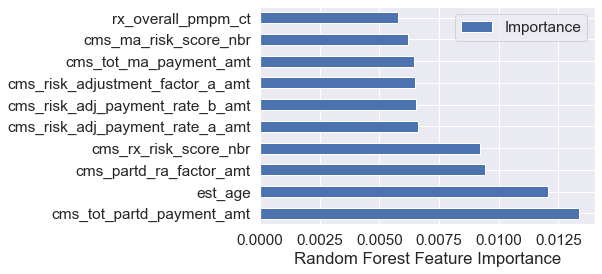

In [102]:
sorted_idx = clf.feature_importances_.argsort()
feature_importance_ = pd.DataFrame({'Importance' : clf.feature_importances_[sorted_idx]}, index = X.columns[sorted_idx])
feature_importance_.nlargest(10, 'Importance').plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

In [69]:
y_pred=clf.predict(X_test)

In [70]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.977740350877193


In [71]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9777187643876073

In [72]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test, y_pred)

In [73]:
CM

array([[17231,   531],
       [  262, 17601]], dtype=int64)

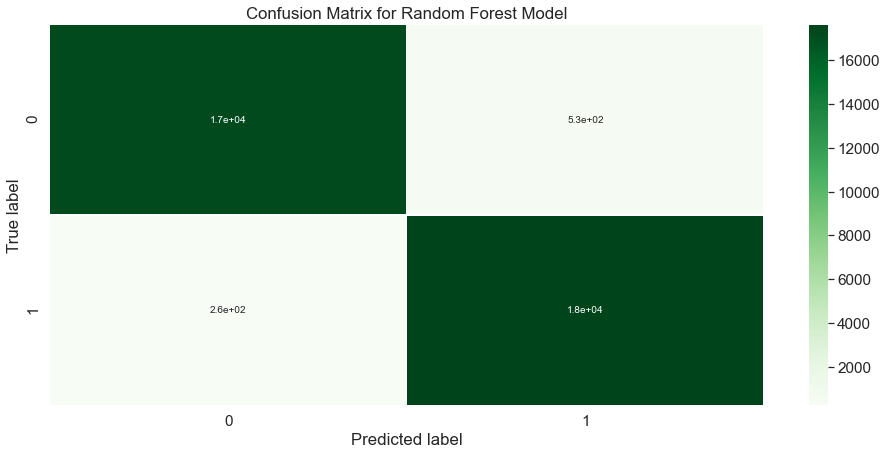

In [74]:
import seaborn
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
seaborn.heatmap(CM,annot=True,cmap=plt.cm.Greens,annot_kws={'size':10},linewidths=0.2)
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [75]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

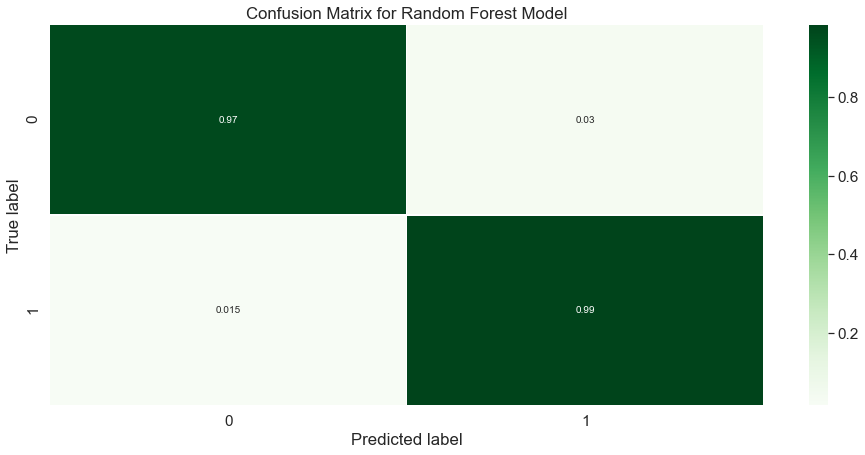

In [76]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)


class_names = [0,1]
tick_marks = np.arange(len(class_names))

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17762
           1       0.97      0.99      0.98     17863

    accuracy                           0.98     35625
   macro avg       0.98      0.98      0.98     35625
weighted avg       0.98      0.98      0.98     35625

